In [55]:
# 실습하기 전 import문
import numpy as np
import pandas as pd
import mglearn
import sklearn
from IPython.display import display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
# 한글 Font
from matplotlib import rc
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)
%matplotlib inline

# CHAPTER 7 텍스트 데이터 다루기

+ 데이터 속성 3가지  
    1) 연속성 특성  
    2) 범주형 특성  
    3) 텍스트
+ 텍스트  
ex) 고객 서비스에서 메시지가 불만사항인지 문의사항인지 구분해야 할 때, 메시지의 제목이나 내용으로 고객의 의도를 자동으로 파악해서 전달하거나 응답. 
텍스트 데이터는 주로 글자가 연결된 문자열로 표현된다.  
텍스트 길이는 다 다르다.  
텍스트 데이터는 전처리해야한다.

## 7.1 문자열 데이터 타입
#문자열 데이터 종류 4가지  

1) 범주형 데이터.  
 고정된 목록으로 구성되어 있고 범주형 변수로 인코딩된다.  
 
2) 범주에 의미를 연결시킬 수 있는 임의의 문자열.  
 이런 경우 자동으로 매핑하기 어렵거나 불가능하다.  
 범주형 변수로 인코딩하려면 가장 보편적인 값을 선택하든지 애플리케이션에 맞게 이런 응답을 포용할 수 있는 범주를 정의해야 한다.  
 이런 처리는 수작업을 많이 해야 하고 자동화하기 어렵기 때문에 추천하지 않는다.   
 
3) 구조화된 문자열 데이터.  
 미리 정의된 범주에 속하지 않지만 직접 입력한 값들이 일정한 구조를 가지는 데이터. ex) 주소,장소,사람 이름,날짜,전화번호.  
 이런 종류의 문자열은 분석하기 매우 어렵고, 처리 방법이 문맥이나 분야에 따라 매우 다르다.    
 
4) 텍스트 데이터.  
 자유로운 형태의 절과 문장으로 구성된 데이터. ex) 트윗,채팅,호텔 리뷰...  
 대부분 단어로 구성된 문장에 정보를 담고 있다.  
 텍스트 분석에서는 데이터셋을 '말뭉치'라 하고, 하나의 텍스트를 의미하는 각 데이터 포인트를 '문서'라고 한다.


## 7.2 예제 애플리케이션 : 영화 리뷰 감성 분석
+ 스텐퍼드 대학교 연구원인 앤드루 마스가 IMDb 웹사이트에서 수집한 영화 리뷰 데이터셋  
리뷰 텍스트와 '양성' 혹은 '음성'을 나타내는 레이블 포함하고 있음.  
1에서 10까지의 점수를 가지고 있음. (7점 이상은 '양성', 4점 이하는 '음성' -> 이진 분류 데이터셋)

In [3]:
# In[3] & In[4]
# 윈도우일 경우...
!tree data/aclImdb

폴더 PATH의 목록입니다.
볼륨 일련 번호는 0296-8277입니다.
C:\USERS\USER\DAY04\DATA\ACLIMDB
├─test
│  ├─neg
│  └─pos
└─train
    ├─neg
    └─pos


In [4]:
# In[5]:
# 윈도우일 경우.
import shutil

shutil.rmtree('data/aclImdb/train/unsup',ignore_errors=True)

In [57]:
# In[6]:
from sklearn.datasets import load_files

reviews_train = load_files("data/aclImdb/train/")
# 텍스트와 레이블을 포함하고 있는 Bunch 오브젝트를 반환합니다.
text_train, y_train = reviews_train.data, reviews_train.target
print("text_train의 타입:", type(text_train))
print("text_train의 길이:", len(text_train))
print("text_train[6]:\n", text_train[6])

text_train의 타입: <class 'list'>
text_train의 길이: 25000
text_train[6]:
 b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [58]:
# In[7]:
# <br/> 태그 삭제 -> 줄바꿈이 머신러닝 모델에 큰 영향을 미치지는 않지만, 태그 삭제 추천함.
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [7]:
# 파이썬 버전 확인.
import sys
print("Python 버전",sys.version)

Python 버전 3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]


+ text_train의 항목의 타입은 파이썬 버전에 따라 다르다.  
파이썬 3에서는 문자열 데이터의 바이너리 인코딩인 bytes 타입임.

In [8]:
#In [8]:
# 양성 클래스와 음성 클래스를 같은 비율로 수집했기 때문에 양성과 음성 레이블의 수 같음.
print("클래스별 샘플 수 (훈련 데이터):", np.bincount(y_train))

클래스별 샘플 수 (훈련 데이터): [12500 12500]


In [9]:
# In [9]:
# 테스트 데이터셋 읽어들이기.
reviews_test = load_files("data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print("테스트 데이터의 문서 수:", len(text_test))
print("클래스별 샘플 수 (테스트 데이터):", np.bincount(y_test))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

테스트 데이터의 문서 수: 25000
클래스별 샘플 수 (테스트 데이터): [12500 12500]


## 7.3 텍스트 데이터를 BOW로 표현하기
+ BOW  
머신러닝에서 텍스트를 표현하는 방법 중 가장 간단하면서도 효과적이여서 널리 쓰이는 방법  
장,문단,문장,서식 같은 입력 텍스트의 구조 대부분을 잃고, 각 단어가 이 말뭉치에 있는 텍스트에 얼마나 많이 나타나는지만 헤아린다.  
->즉, 각 단어가 이 말뭉치에 있는 텍스트에 얼마나 많이 나타나는지만 헤아린다.

+ BOW 표현 계산 단계  
1) 토큰화  
각 문서를 문서에 포함된 단어(토큰)로 나눈다.  
2) 어휘 사전 구축.  
모든 문서에 나타난 모든 단어의 어휘를 모으고 번호를 매긴다.  
3) 인코딩. 
어휘 사전의 단어가 문서마다 몇 번이나 나타나는지 헤아린다.

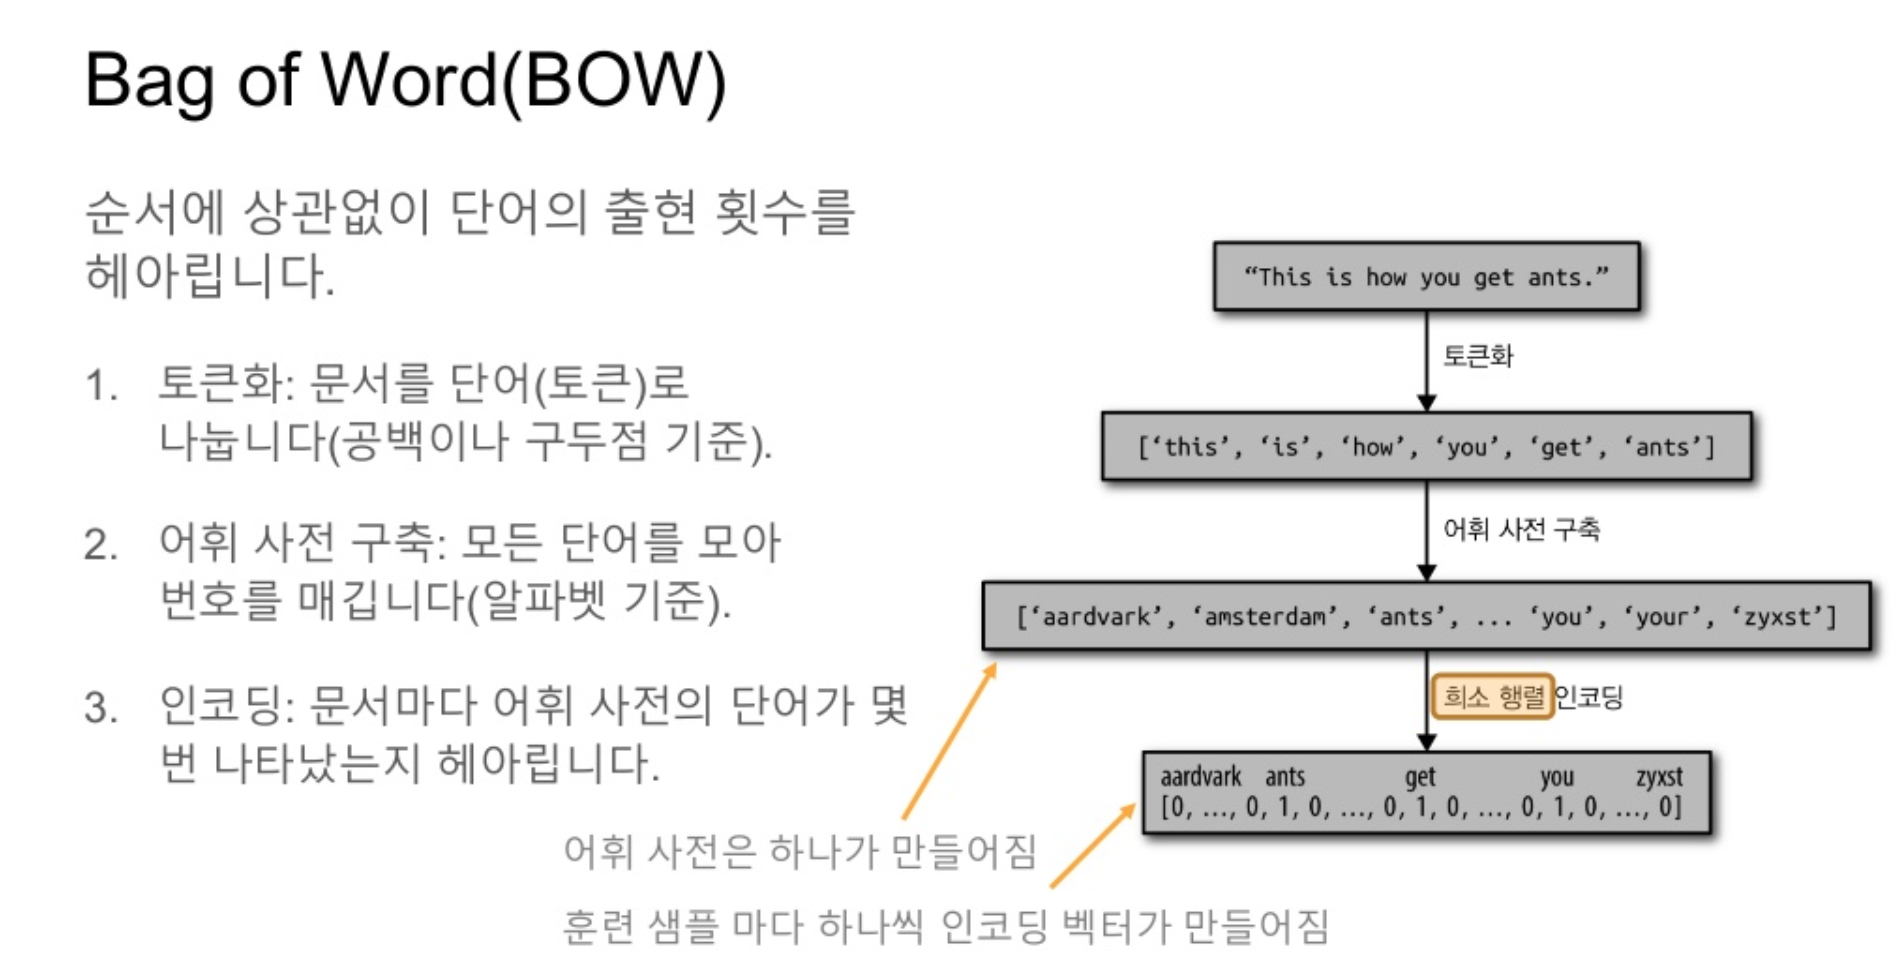

In [10]:
# 그림 7-1 : 샘플 데이터에 BOW 적용하기
from IPython.display import Image
Image('t1.png',width=800,height=800)

### 7.3.1 샘플 데이터에 BOW 적용하기

- BOW 표현은 CountVectorizer에 변환기 인터페이스로 구현되어 있음`

In [11]:
#In [10]: 두 샘플만 포함한 간단한 데이터셋에 적용
bards_words =["The fool doth think he is wise,",
              "but the wise man knows himself to be a fool"]

In [12]:
#In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

- CountVectorizer의 fit 메서드: 훈련 데이터를 토큰으로 나누고 어휘 사전을 구축하여 vocabulary_속성에 저장

In [13]:
#In [12]:
print("어휘 사전의 크기:", len(vect.vocabulary_))
print("어휘 사전의 내용:\n", vect.vocabulary_)

어휘 사전의 크기: 13
어휘 사전의 내용:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


- 훈련 데이테에 대해 BOW 표현을 만들려면 transform 메서드를 호출함

In [14]:
#In [13]:
bag_of_words = vect.transform(bards_words)
print("BOW:", repr(bag_of_words))

BOW: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


- BOW 표현은 0이 아닌 값만 저장하는 Scipy 희소 행렬로 저장되어 있음.
- 행렬의 크기: 2x13(샘플수x단어수)
- 대부분의 문서는 어휘 사전에 있는 단어 중 일부만 포함하므로, 즉 특성 배열의 대부분의 원소가 0이라서 희소 행렬을 사용함.
- 값이 0인 원소를 모두 저장하는 것은 메모리 낭비라서 피해야 함.
- 희소 행렬의 실제 내용을 보려면 toarray 메서드를 사용하여(0인 원소도 모두 저장되도록) 밀집된 NumPy 배열로 바꿔야 함.

In [15]:
#In [14]:
print("BOW의 밀집 표현:\n", bag_of_words.toarray())

BOW의 밀집 표현:
 [[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


- 각 단어의 출현 횟수를 나타낸 것
- 각 단어의 출현 횟수는 0 아니면 1인 것을 알 수 있음->같은 단어를 두 개 이상 가지고 있지 않음

### 7.3.2 영화 리뷰에 대한 BOW

- 이제는 영화 리뷰에 대한 감성 분석을 적용해 보겠음
- 앞에서는 IMDb 리뷰의 훈련 데이터와 테스트 데이터를 읽어서 작업할 문자열 리스트로 바꿨음

In [16]:
#In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n", repr(X_train))

X_train:
 <25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [17]:
# In [16]:
feature_names = vect.get_feature_names()
print("특성 개수:", len(feature_names))
print("처음 20개 특성:\n", feature_names[:20])
print("20010에서 20030까지 특성:\n", feature_names[20010:20030])
print("매 2000번째 특성:\n", feature_names[::2000])

특성 개수: 74849
처음 20개 특성:
 ['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
20010에서 20030까지 특성:
 ['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']
매 2000번째 특성:
 ['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


- 처음 20개 특성을 보면 숫자로 이루어진 단어들이 많은데 이 숫자들은 대부분 그 자체로 의미가 있지 않음
- "dra"로 시작하는 단어의 목록 또한 서로 다른 단어로 어휘 사전에 포함되어 있음(단수, 복수형으로 같은 단어임)
- 특성 추출 방법을 개선하기 전에, 분류기를 만들어 성능 수치를 확인해보겠음
  - y_train에 있는 훈련 레이블과 X_train에 있는 훈련 데이터의 BOW 표현으로 분류기를 학습해보겠음
- 희소 행렬의 고차원 데이터셋에서는 LogisticRegression 같은 선형 모델의 성능이 가장 뛰어남
  - 교차 검증을 사용해 LogisticRegression 모델의 성늘을 평가해보겠음

In [18]:
#In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(max_iter=1000), X_train, y_train, cv=5)
print("크로스 밸리데이션 평균 점수: {:.2f}".format(np.mean(scores)))

크로스 밸리데이션 평균 점수: 0.88


- 교차 검증 평균 점수로 0.88은 꽤 괜찮은 이진 분류 성능임
- LogisticRegression에는 규제 매개변수 C가 있음->그리드 서치를 사용해 조정해보겠음

In [19]:
#In [18]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최상의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))
print("최적의 매개변수: ", grid.best_params_)

최상의 크로스 밸리데이션 점수: 0.89
최적의 매개변수:  {'C': 0.1}


- C=0.1 이 매개변수를 사용해서 테스트 세트의 일반화 성능을 재보겠음.

In [20]:
#In [19]:
X_test = vect.transform(text_test)
print("테스트 점수: {:.2f}".format(grid.score(X_test, y_test)))

테스트 점수: 0.88


- 이제 단어 추출 방법을 개선할 차례
- CountVectorizer는 정규표현식을 사용해 토큰을 추출
  - 기본적으로 사용하는 정규표현식: $"\b\w\w+\b"$
- 한글자로 된 단어는 찾지 않음
- "doesn't와 같은 축약형이나 "bit.ly"같은 단어는 분리되고, "h8ter"는 한 단어로 매칭됨
- CountVectroizer는 모든 단어를 소문자로 바꾸어 모두 같은 토큰(즉 특성)이 됨
- 의미 없는 특성(숫자 같은)을 줄이는 방법은 적어도 두개의 문서에 나타난 토큰만을 사용하는 것
- min_df 매개변수로 토큰이 나타날 최소 문서 개수를 지정할 수 있음

In [21]:
#In [20]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("min_df로 제한한 X_train:", repr(X_train))

min_df로 제한한 X_train: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


- 특성의 수가 원래 개수의 1/3 정도인 27,271개로 줄었음
- 다음은 토큰 내용을 살펴봄

In [22]:
#In [21]:
feature_names = vect.get_feature_names()

print("First 50 features:\n", feature_names[:50])
print("Features 20010 to 20030:\n", feature_names[20010:20030])
print("Every 700th feature:\n", feature_names[::700])

First 50 features:
 ['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
Features 20010 to 20030:
 ['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
Every 700th feature:
 ['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom', 'messiah', 'music', 'occasional', 'parking', 'pleasantville', 'pronunci

- 숫자 길이가 줄었고 희귀한 단어와 철자가 틀린 단어들이 사라졌음
- 그리드 서치를 사용해 모델의 성능을 확인해보겠음

In [23]:
#In [22]:
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최적의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))

최적의 크로스 밸리데이션 점수: 0.89


- 이전과 0.89로 같은 점수를 가짐
- 모델 성능은 높아지지 않았지만 특성의 개수가 줄어서 처리 속도가 빨라지고, 불필요한 특성이 없어져 모델을 이해하기가 쉬워졌음.

## 7.4 불용어

- 의미 없는 단어를 제거하는 또 다른 방법은 너무 빈번하여 유용하지 않은 단어를 제외하는 것
  1. 언어별 불용어 목록을 사용하는 것
  2. 너무 자주 나타나는 단어를 제외하는 것
- scikit-learn은 feature-extraction.text 모듈에 영어의 불용어를 가지고 있음

In [24]:
#In [23]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("불용어 개수:", len(ENGLISH_STOP_WORDS))
print("매 10번째 불용어:\n", list(ENGLISH_STOP_WORDS)[::10])

불용어 개수: 318
매 10번째 불용어:
 ['wherein', 'whence', 'sincere', 'once', 'there', 'why', 'nor', 'back', 'mostly', 'so', 'can', 'throughout', 'it', 'me', 'seeming', 'thin', 'until', 'amoungst', 'via', 'such', 'two', 'each', 'we', 'also', 'hundred', 'top', 'seem', 'none', 'for', 'herself', 'somehow', 'through']


- 불용어를 제외하면 특성의 개수가 이 목록의 길이(318개) 만큼만 줄어들겠지만, 성능이 향상될 수도 있음.

In [25]:
#In [24]:
# stop_words="english"라고 지정하면 내장된 불용어를 사용합니다.
# 내장된 불용어에 추가할 수도 있고 자신만의 목록을 사용할 수도 있습니다.
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("불용어가 제거된 X_train:\n", repr(X_train))

불용어가 제거된 X_train:
 <25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


- 데이터셋에서 특성이 26,966개, 즉 305개 줄었다.
- 그리드 서치를 다시 적용해봄

In [26]:
#In [25]:
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최상의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))

최상의 크로스 밸리데이션 점수: 0.88


- 그리드 서치의 성능은 신경 쓸 정도는 아니지만 조금 감소
- 27,000개가 넘는 특성에서 305개를 제외했다고 성능이나 모델 해석이 나아진 것 같지는 않으므로, 이 목록을 사용하는 게 도움이 안됌
- 하지만 데이터셋만 보고 불용어를 골라내기 어려운 작은 데이터셋에서는 도움이 될거임

## 7.5 tf-idf로 데이터 스케일 변경하기

+ 얼마나 의미 있는 특성인지를 계산해서 스케일을 조정하는 방식이 있음
+ tf-idf : 말뭉치의 다른 문서보다 특정 문서에 자주 나타나는 단어에 높은 가중치를 주는 방법
+ 한 단어가 특정 문서에 자주 나타나고 다른 여러 문서에서는 그렇지 않다면, 그 문서의 내용을 아주 잘 설명하는 단어라고 볼 수 있음

+ 두 개의 파이썬 클래스에 tf-idf를 구현함
+ TfidfTransformer : CountVectorizer가 만든 희소 행렬을 입력받아 변환함
+ TfidfVectorizer : 텍스트 데이터를 입력받아 BOW특성 추출과 tf-idf 변환을 수행함

+ 문서 d에 있는 단어 w에 대한 tf-idf점수는 다음과 같이 정의되어 있음


    
\begin{equation*}
\text{tfidf}(w, d) = \text{tf} \times (\log\big(\frac{N + 1}{N_w + 1}\big) + 1)
\end{equation*}


+ N : 훈련 세트에 있는 문서의 개수
+ Nw : 단어 w가 나타난 훈련 세트 문서의 개수
+ tf(단어 빈도수)는 단어 w가 대상 문서d(변환 또는 인코딩하려는 문서)에 나타난 횟수임


+ 두 파이썬 클래스 모두 tf-idf 계산을  한 후에 L2 정규화를 적용함
+ *이렇게 스케일이 바뀐 벡터는 문서의 길이(단어의 수)에 영향을 받지 않음*

In [27]:
# In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=5000))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("최상의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))

최상의 크로스 밸리데이션 점수: 0.89


In [28]:
# In [30]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# 훈련 데이터셋을 변환합니다
X_train = vectorizer.transform(text_train)
# 특성별로 가장 큰 값을 찾습니다
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# 특성 이름을 구합니다
feature_names = np.array(vectorizer.get_feature_names())

print("가장 낮은 tfidf를 가진 특성:\n",
      feature_names[sorted_by_tfidf[:20]])

print("가장 높은 tfidf를 가진 특성: \n",
      feature_names[sorted_by_tfidf[-20:]])

가장 낮은 tfidf를 가진 특성:
 ['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
가장 높은 tfidf를 가진 특성: 
 ['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


In [29]:
# In [31]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("가장 낮은 idf를 가진 특성:\n",
       feature_names[sorted_by_idf[:100]])

가장 낮은 idf를 가진 특성:
 ['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


## 7.6 모델 계수 조사

In [30]:
# In [32]:
grid.best_estimator_.named_steps["logisticregression"].coef_

array([[-0.44090384, -0.48414539, -0.11894461, ...,  0.29069327,
        -0.08847824, -0.36798518]])

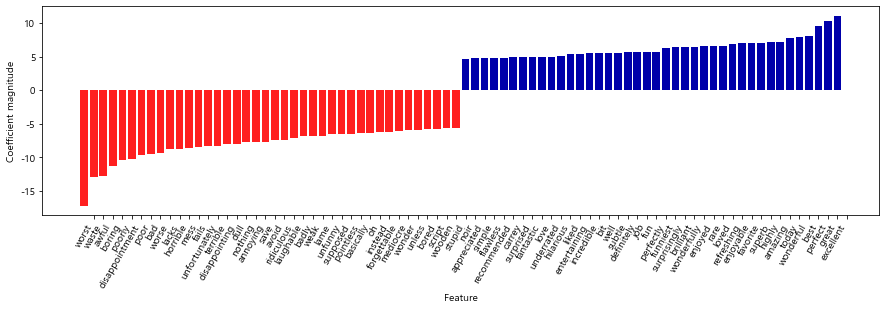

In [31]:
# In [33]:
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_[0],
    feature_names, n_top_features=40)

## 7.7 여러 단어로 만든 BOW(n-그램)

In [32]:
# In [34]:
print("bards_words:\n", bards_words)

bards_words:
 ['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [33]:
# In [35]:
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
print("어휘 사전:\n", cv.get_feature_names())

어휘 사전 크기: 13
어휘 사전:
 ['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


In [34]:
#In [36]:
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
print("어휘 사전:\n", cv.get_feature_names())

어휘 사전 크기: 14
어휘 사전:
 ['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


In [35]:
# In [37]:
print("변환된 데이터 (밀집 배열):\n", cv.transform(bards_words).toarray())

변환된 데이터 (밀집 배열):
 [[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [36]:
# In [38]:
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
print("어휘 사전:\n", cv.get_feature_names())

어휘 사전 크기: 39
어휘 사전:
 ['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


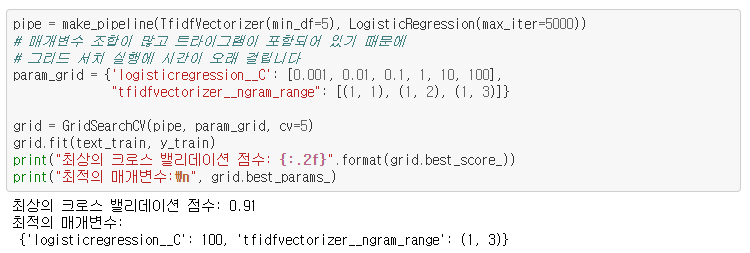

In [54]:
Image('p39.png',width=800,height=1000)

+ 1%이상 성능을 올림

+ 두 매개변수에 대한 교차 검증 정확도를 히트맵으로 나타내보자

In [59]:
# In[40]:
# 그리드 서치에서 테스트 점수를 추출합니다
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# 히트맵을 그립니다
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

ValueError: cannot reshape array of size 5 into shape (3)

+ 최적 모델의 중요 계수를 그래프로 나타내보자

In [38]:
# In[41]:
# 특성 이름과 계수를 추출합니다
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef[0], feature_names, n_top_features=40)
plt.ylim(-22, 22)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
# In[42]:
# 트라이그램 특성을 찾습니다
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
# 트라이그램 특성만 그래프로 나타냅니다
mglearn.tools.visualize_coefficients(coef.ravel()[mask],
                                     feature_names[mask], n_top_features=40)
plt.ylim(-22, 22)

## 7.8 고급 토큰화, 어간추출, 표제어 추출

전문적인 텍스트 처리 애플리케이션이 뛰어난 부분, **토큰화**

앞서 어휘사전에서의 예를 보면,
- drawback/drawbacks, drawer/drawers, drawing/drawings  
의미가 매우 가까워서 이를 구분하면, 과대적합되기 쉽고,모델이 훈련 데이터를 완전하게 활용x  
- replace/replaced/replacement/replaces,/replacing  
명사에 단수,복수 형태가 있는 것처럼 여러 동사형과 관련 단어들을 다른 토큰으로 다루면 모델을 일반화하는데 도움x

이를 해결하려면, **어간추출**, **표제어 추출**  
- 어간추출: 일일이 어미를 찾아 제외하는 규칙 방식  
- 표제어추출: 명시적이고 사람이 구축한 시스템을 사용하고 문장에서 단어의 역할을 고려하는 처리 방식  

*두 처리 방식은 단어의 일반 형태를 추출하는 **정규화**의 한 형태*

In [ ]:
conda install nltk spacy

In [ ]:
python -m spacy download en_core_web_sm

In [ ]:
# In[43]:
import spacy
import nltk

# spacy의 영어 모델을 로드합니다
en_nlp = spacy.load('en_core_web_sm')
# nltk의 PorterStemmer 객체를 만듭니다
stemmer = nltk.stem.PorterStemmer()

# spacy의 표제어 추출과 nltk의 어간 추출을 비교하는 함수입니다
def compare_normalization(doc):
    # spacy로 문서를 토큰화합니다
    doc_spacy = en_nlp(doc)
    # spacy로 찾은 표제어를 출력합니다
    print("표제어:")
    print([token.lemma_ for token in doc_spacy])
    # PorterStemmer로 찾은 토큰을 출력합니다
    print("어간:")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [ ]:
# In[44]:
compare_normalization(u"Our meeting today was worse than yesterday, "
                       "I'm scared of meeting the clients tomorrow.")

표제어 추출은 어간 추출보다 훨씬 복잡한 처리를 거친다.  
*머신러닝을 위해 토큰 정규화를 할 때는 어간 추출보다 좋은 결과를 낸다.*

In [ ]:
# In[45]:
from sklearn.feature_extraction.text import CountVectorizer
# 요구사항: spacy에서 표제어 추출 기능과 CountVectorizer의 토큰 분할기를 사용합니다.

# spacy의 언어 모델을 로드합니다
en_nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# spacy 문서 처리 파이프라인을 사용해 자작 토큰 분할기를 만듭니다
# (우리만의 토큰 분할기를 사용합니다)
def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

# 자작 토큰 분할기를 사용해 CountVectorizer 객체를 만듭니다
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)

In [ ]:
# In[46]:
# 표제어 추출이 가능한 CountVectorizer 객체로 text_train을 변환합니다
X_train_lemma = lemma_vect.fit_transform(text_train)
print("X_train_lemma.shape:", X_train_lemma.shape)

# 비교를 위해 표준 CountVectorizer를 사용합니다
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train.shape:", X_train.shape)

표제어 추출은 특성 개수를 27,271개에서 20,660개로 줄여준다.  
표제어 추출은 일부 특성들을 합치기 때문에 일종의 규제로 볼 수 있다. 

In [39]:
# In[47]:
# 훈련 세트의 1%만 사용해서 그리드 서치를 만듭니다
from sklearn.model_selection import StratifiedShuffleSplit

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.99,
                            train_size=0.01, random_state=0)
grid = GridSearchCV(LogisticRegression(), param_grid, cv=cv)
# 기본 CountVectorizer로 그리드 서치를 수행합니다
grid.fit(X_train, y_train)
print("최상의 크로스 밸리데이션 점수 "
      "(기본 CountVectorizer): {:.3f}".format(grid.best_score_))
# 표제어를 사용해서 그리드 서치를 수행합니다
grid.fit(X_train_lemma, y_train)
print("최상의 크로스 밸리데이션 점수 "
      "(표제어): {:.3f}".format(grid.best_score_))

최상의 크로스 밸리데이션 점수 (기본 CountVectorizer): 0.772


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NameError: name 'X_train_lemma' is not defined

표제어가 어떻게 효과가 있는지 보기 위해 StratifiedShulffleSplit을 사용해 훈련 세트의 1%만 훈련 폴드로 하고, 나머지는 테스트 폴드로 하여 교차검증을 수행  
**표제어 추출과 어간 추출은 모델을 더 낫게 만들어주기 때문에, 어떤 작업에서 마지막 성능까지 쥐어 짜내야 할 때 시도해보면 좋다**

### 7.8.1 KoNLPy를 사용한 영화 리뷰 분석

In [40]:
import konlpy
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'konlpy'

In [ ]:
df_train = pd.read_csv('data/ratings_train.txt', delimiter='\t', keep_default_na=False)
df_train.head(n=3)

- KoNLPy는 여러 언어로 만들어진 형태소 분석기를 파이썬에서 손쉽게 사용할 수 있도록 도와 주는 도구  
- keep_default_na = False 로 지정하여 빈 문자열 그대로 저장  
- label이 0이면 부정적 리뷰/1이면 긍정적인 리뷰

In [41]:
text_train, y_train = df_train['document'].values, df_train['label'].values

NameError: name 'df_train' is not defined

In [ ]:
df_test = pd.read_csv('data/ratings_test.txt', delimiter='\t', keep_default_na=False)
text_test = df_test['document'].values
y_test = df_test['label'].values

In [ ]:
len(text_train), np.bincount(y_train)

In [ ]:
len(text_test), np.bincount(y_test)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
from konlpy.tag import Okt
okt_tag = Okt()
def okt_tokenizer(text):
    return okt_tag.morphs(text)

In [ ]:
okt_param_grid = {'tfidfvectorizer__min_df': [3,5,7],
              'tfidfvectorizer__ngram_range': [(1, 1),(1, 2),(1, 3)],
              'logisticregression__C': [0.1, 1, 10]}
okt_pipe = make_pipeline(TfidfVectorizer(tokenizer=okt_tokenizer), LogisticRegression(solver='liblinear'))
okt_grid = GridSearchCV(okt_pipe, okt_param_grid, n_jobs=1, cv=3)

# 그리드 서치를 수행합니다
okt_grid.fit(text_train, y_train)
print("최상의 교차 검증 점수: {:.3f}".format(okt_grid.best_score_))
print("최적의 교차 검증 매개변수: ", okt_grid.best_params_)

## 7.9 토픽 모델링과 문서 군집화
+ **토픽 모델링** : 비지도 학습으로 문서를 토픽으로 할당하는 작업
+ 한 문서가 하나의 토픽에 할당되면 문서를 군집시키는 문제가 되고 둘 이상의 토픽을 가진다면 분해 방법과 관련이 있다.  

### 7.9.1 LDA (잠재 디리클레 할당)
+ 자주 나타나는 단어의 그룹(토픽)을 찾는 것
+ 머신러닝에서의 토픽은 '주제' 보다는 PCA나 NMF로 추출한 성분을 말한다.
+ 텍스트 문서에 대한 비지도 학습 모델에서 분석 결과가 왜곡되지 않으려면 자주 나타나는 단어를 제거하는 것이 좋다.

In [42]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

기본 학습 방법(online) 대신 조금 느리지만 성능이 더 나은 "batch"방법을 사용하고 모델 성능을 위해 "max_iter"값 증가

In [43]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
                                max_iter=25, random_state=0)
# 모델 생성과 변환을 한 번에 합니다
# 변환 시간이 좀 걸리므로 시간을 절약하기 위해 동시에 처리합니다
document_topics = lda.fit_transform(X)

각 단어의 중요도를 저장한 components 속성 적용

In [44]:
print("lda.components_.shape:", lda.components_.shape)

lda.components_.shape: (10, 10000)


In [45]:
# 토픽마다(components_의 행) 특성을 오름차순으로 정렬합니다
# 내림차순이 되도록 [:, ::-1] 사용해 행의 정렬을 반대로 바꿉니다
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# CountVectorizer 객체에서 특성 이름을 구합니다.
feature_names = np.array(vect.get_feature_names())

In [46]:
# 10개의 토픽을 출력합니다
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
performance   director      us            family        war           
role          nothing       book          young         world         
cast          script        real          father        action        
actors        actors        world         old           us            
performances  doesn         point         mother        series        
excellent     seems         may           girl          american      
beautiful     work          own           son           new           
version       interesting   true          years         our           
actor         enough        fact          woman         human         
director      sex           god           show          japanese      


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
acti

100개의 토픽으로 새로운 모델을 학습  
-> 많은 토픽을 사용하면 분석은 더 어려워지지만 데이터에서 특이한 부분을 잘 잡아낼 수 있다.

In [47]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch",
                                   max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [48]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 41, 45, 51, 53, 54, 63, 89, 97])

In [49]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      
--------      --------      --------      --------      --------      
noir          ben           kelly         horror        studio        
welles        drew          jerry         killer        years         
atmosphere    sports        george        gore          spy           
thriller      baseball      sinatra       sex           new           
dark          team          washington    violence      star          
lady          roberts       tom           blood         early         
ghost         red           fisher        nudity        later         
suspense      league        frank         slasher       version       
black         pitch         ned           pretty        bo            
mysterious    jimmy         gene          flick         release       
house         barrymore     mouse         porn          british       
moments       fever         denzel        serial        produced      
style 

토픽을 이용해 추론을 잘 하려면 토픽에 할당된 문서를 보고 **가장 높은 순위에 있는 단어**의 의미를 확인해야 한다.

In [50]:
# 음악적인 토픽 45를 가중치로 정렬합니다
music = np.argsort(document_topics100[:, 45])[::-1]
# 이 토픽이 가장 비중이 큰 문서 다섯개를 출력합니다
for i in music[:10]:
    # 첫 두 문장을 출력합니다
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

b'this movie begins with an ordinary funeral..\n'
b'this movie begins with an ordinary funeral..\n'
b"I'm fan of ART, I like anything about Art, I like paintings, sculptures, etc. This movie shows it, so I like it a lot, it shows how a woman wants to paint anything about Art, especially naked bodies, but she can't do it because of her strict family (father), at the beginning of the movie she painted herself naked, but she wanted a man for her paintings, but her family didn't let her paint naked men because it's against the moral.\n"
b'This film should have been only 10 minutes. I mean there is really only 10 minute worth of watchable content in this thing (I even hesitate to call it a movie).\n'
b'With the death of GEORGE NADER, on 4 February 2002, I thought of this most interesting program, which even though it had only a short run, was a tremendous idea with good story lines throughout. Generally unseen for over 40+ years it would be worth viewing again.\n'
b'Paul (Jason Lee) is an u

토픽을 조사하는 다른 방법은 각 토픽의 **가중치**가 얼마인지 모든 리뷰에 걸쳐 document_topics 값을 합해 보는 것이다.

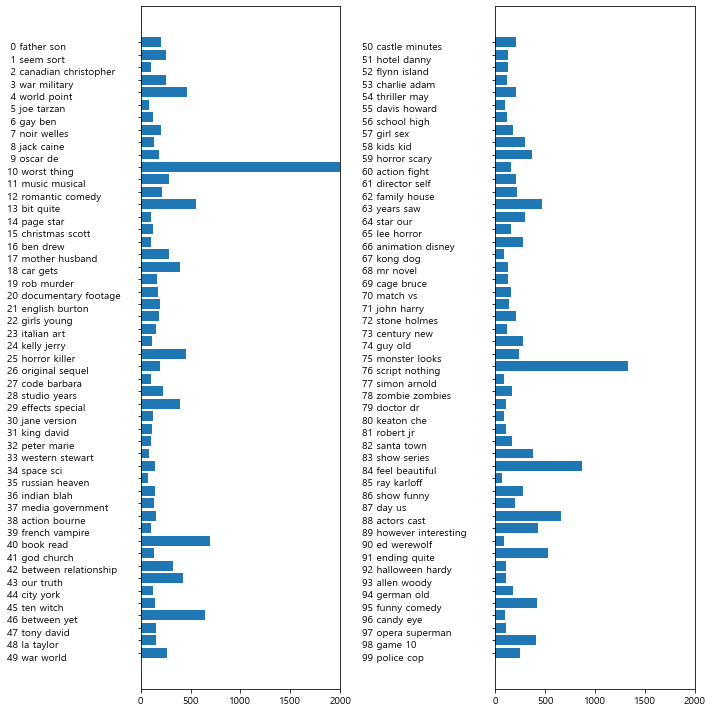

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]
# 두 개의 열이 있는 막대 그래프
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

+ 중요도가 높은 토픽 중 97번은 불용어에 가깝고 부정적 경향의 단어이다. 토픽 16은 또한 부정적 단어이고 토픽 36, 37은 칭찬하는 단어이다.
+ 대부분의 리뷰가 특정 영화에 대한 의견이거나 평가 점수를 합리화하거나 강조하기 위한 댓글이라는 사실을 알 수 있다.

#### LDA 특징
+ 레이블이 없거나, 레이블이 있더라도 큰 규모의 텍스트 말뭉치를 해석하는 데 좋은 방법이다.
+ LDA는 **확률적 알고리즘**이기 때문에 random_state 매개변수를 바꾸면 결과가 많이 달라진다.
+ 토픽으로 구별하더라도 비지도 학습에서 내린 결론은 보수적으로 평가해야 하므로 **문서를 직접 보고 직관적으로 검증**하는 것이 필요하다.
+ LDA.transform 메서드에서 만든 토픽이 지도 학습을 위한 압축된 표현으로 사용될 수 있다.  
-> 훈련 데이터가 적고 특성의 수가 많을 때 과대적합되기 쉬우므로 **특성의 수를 줄이는데 LDA를 사용**할 수 있다는 뜻